# MIRZA SAMAD 1790-2020 
# MACHINE LEARNING LAB 5
# TEACHER NAME: SIR SHAHID 
# ----------------------------------------- ML LAB 5 ------------------------------------------------------
# ===============================================================

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('credit_dataset.csv')

In [91]:
df.tail(2)


,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1
25133,25133,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,1.0,13,25,3,1


# QUESTION NUMBER 1

In [92]:
# OUTLIERS - CREATE OUTLIERS IF NOT AVAILABLE
df.nunique()


Unnamed: 0        25134
ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

# QUESTION NUMBER 2 

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

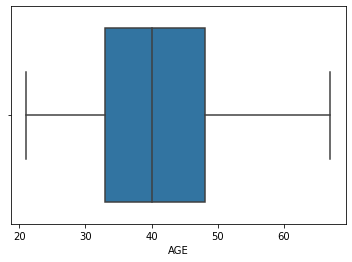

In [93]:
#show outliers using BOX PLOT
sns.boxplot(df["AGE"]) # Show outliers in BOX PLOT


# QUESTION NUMBER 3

In [94]:
# REMOVE OUTLIERS
outliers = [x for x in df["AGE"] if x >100] # Show outliers Values
outliers

[]

In [95]:
df.fillna(value=df.mean, inplace=True) # FILL NULL VALUES

In [96]:
df.dropna(inplace=True) # DROP NULL VALUES

In [97]:
AG=df['AGE'].mean() # GET MEAN OF COLUMN TO REPLACE OUTLIERS WITH MEAN
mie=np.round(AG)
mie

41.0

In [98]:
#outliers = [x for x in df["AGE"] if x >100]

for i in range(len(outliers)): # REMOVE OUTLIERS
    df.replace(outliers[i],mie,inplace=True)

In [99]:
outliers

[]

<AxesSubplot:>

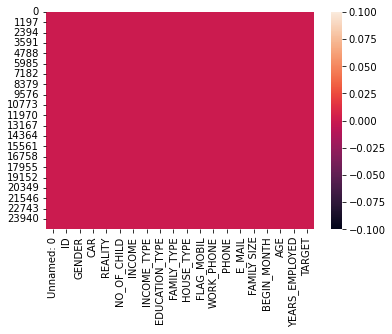

In [100]:
sns.heatmap(df.isnull()) # CHECK NULL VALUES CROSS V VERIFYING


# QUESTION NUMBER 4 & 5

In [101]:
# CREATE DUMMY VALUES FOR REQUIRED COLUMNS 
dummy_income_type = pd.get_dummies(df['INCOME_TYPE'], prefix='INC_TYPE', drop_first=True)
dummy_edu_type = pd.get_dummies(df['EDUCATION_TYPE'], prefix='EDU_TYPE', drop_first=True)
dummy_family_type = pd.get_dummies(df['FAMILY_TYPE'], prefix='FAM_TYPE', drop_first=True)
dummy_house_type = pd.get_dummies(df['HOUSE_TYPE'], prefix='HOUSE_TYPE', drop_first=True)


In [102]:
# DROP OTHERS FROM ORIGNAL DATASET SO WE CAN CONCATINATE
to_drop = ['Unnamed: 0', 'ID', 'FLAG_MOBIL', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'INCOME_TYPE', 'HOUSE_TYPE']
df.drop(to_drop, axis=1, inplace=True)

In [103]:
# MERGE COLUMNS
df1 = pd.concat([df, dummy_income_type, dummy_edu_type, dummy_family_type, dummy_house_type], axis=1)
df1.head()

# REPLACE MALE, FEMALE, YES, NO AND ALL BINARY VALUES INTO 0 AND 1
df1.replace("M",1,inplace=True)
df1.replace("F",0,inplace=True)

df1.replace("Y",1,inplace=True)
df1.replace("N",0,inplace=True)

df1

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,...,EDU_TYPE_Secondary / secondary special,FAM_TYPE_Married,FAM_TYPE_Separated,FAM_TYPE_Single / not married,FAM_TYPE_Widow,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,1,1,1,0,112500.0,0,0,0,2.0,29,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0,270000.0,0,1,1,1.0,4,...,1,0,0,1,0,1,0,0,0,0
2,0,0,1,0,270000.0,0,1,1,1.0,26,...,1,0,0,1,0,1,0,0,0,0
3,0,0,1,0,270000.0,0,1,1,1.0,26,...,1,0,0,1,0,1,0,0,0,0
4,0,0,1,0,270000.0,0,1,1,1.0,38,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,1,0,315000.0,0,0,0,2.0,11,...,1,1,0,0,0,1,0,0,0,0
25130,0,0,1,0,157500.0,0,1,1,2.0,23,...,0,1,0,0,0,1,0,0,0,0
25131,0,0,1,0,157500.0,0,1,1,2.0,32,...,0,1,0,0,0,1,0,0,0,0
25132,0,0,1,0,283500.0,0,0,0,2.0,9,...,1,1,0,0,0,1,0,0,0,0


In [104]:
# split data
# SPLITTING CLASSES AND FEATURE
X = df1.drop('TARGET', axis=1)
y = df1['TARGET']

In [105]:
# USING SMOTE TECHNIQUE TO FIX IMBALANCE 
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (25134, 29)
Shape of X after SMOTE: (49424, 29)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: TARGET, dtype: float64

# QUESTION NUMBER 6

In [106]:
# find relations between columns
df.corr()

,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
NO_OF_CHILD,1.000000,-0.015081,-0.009954,-0.019342,-0.015478,0.902228,0.001626,-0.255850,-0.065113,-0.000867
INCOME,-0.015081,1.000000,-0.090386,0.010771,0.076037,-0.025811,0.020711,0.058034,0.020723,0.006530
WORK_PHONE,-0.009954,-0.090386,1.000000,0.369615,-0.067241,0.008216,0.011387,-0.038697,0.008254,0.005869
PHONE,-0.019342,0.010771,0.369615,1.000000,0.009078,-0.007568,0.017650,0.026245,0.041822,0.003023
E_MAIL,-0.015478,0.076037,-0.067241,0.009078,1.000000,-0.009906,-0.007224,-0.061468,-0.039756,0.000537
FAMILY SIZE,0.902228,-0.025811,0.008216,-0.007568,-0.009906,1.000000,0.021076,-0.212130,-0.048740,-0.005587
BEGIN_MONTH,0.001626,0.020711,0.011387,0.017650,-0.007224,0.021076,1.000000,0.088954,0.091180,0.060713
AGE,-0.255850,0.058034,-0.038697,0.026245,-0.061468,-0.212130,0.088954,1.000000,0.342355,-0.007880
YEARS_EMPLOYED,-0.065113,0.020723,0.008254,0.041822,-0.039756,-0.048740,0.091180,0.342355,1.000000,-0.033367
TARGET,-0.000867,0.006530,0.005869,0.003023,0.000537,-0.005587,0.060713,-0.007880,-0.033367,1.000000


# QUESTION NUMBER 7

<AxesSubplot:>

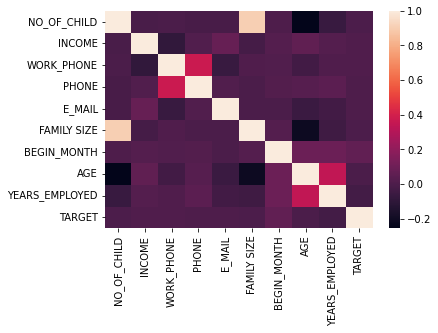

In [107]:
# plot relations between columns
sns.heatmap(df.corr())

# QUESTION NUMBER 8

In [108]:
# FEATURE SELECCTION USING CHI2
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)
chi_scores

(array([6.70241126e+00, 1.09654273e-03, 4.10040406e+00, 2.28700258e-02,
        6.00792948e+04, 6.28670500e-01, 1.62446150e-01, 6.50630357e-03,
        3.07022697e-01, 9.58535806e+02, 3.51841894e+00, 1.59802691e+02,
        7.61270142e+02, 3.53019730e+00, 1.70767239e-01, 6.48749385e-03,
        5.78611184e-01, 1.14243813e+00, 2.65017782e+00, 8.33374936e-01,
        9.97063651e-01, 3.83009857e+00, 1.11296306e+01, 2.89163200e+00,
        1.37877965e-01, 2.14848150e+00, 8.37591064e-01, 2.59295173e-01,
        4.15425747e-02]),
 array([9.62826158e-003, 9.73583609e-001, 4.28729663e-002, 8.79795556e-001,
        0.00000000e+000, 4.27843403e-001, 6.86914319e-001, 9.35711027e-001,
        5.79512950e-001, 1.85045423e-210, 6.06903169e-002, 1.24956266e-036,
        1.42197200e-167, 6.02606171e-002, 6.79430837e-001, 9.35803823e-001,
        4.46857208e-001, 2.85137727e-001, 1.03538314e-001, 3.61298443e-001,
        3.18022063e-001, 5.03399722e-002, 8.49595116e-004, 8.90406882e-002,
        7.1039